### CSE 5243 - Introduction to Data Mining
## Homework 1: CRISP_DM Steps 2-3 (with Exploratory Data Analysis)
Replace the example information below with your real information:
- Semester: Autumn 2024
- Instructor: Tom Bihari
- Section Tue/Thu 12:45PM
- Student Name: Mary Shas Anak Rowin Umpok
- Student Email: anakrowinumpok.1@osu.edu
- Student ID: 500611954

Based on CRISP-DM Template Version V15.

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
- **(I will fill this in for each assignment - Tom Bihari)**
***

### Assignment Overview
In this assignment, you will analyze a **MODIFIED** copy of the “Bank Marketing” dataset.
- This dataset was pulled from: https://archive.ics.uci.edu/dataset/222/bank+marketing
- Dataset citation: Moro,S., Rita,P., and Cortez,P.. (2012). Bank Marketing. UCI Machine Learning Repository. https://doi.org/10.24432/C5K306.
- Use the **copy of the dataset provided to you** for this assignment.
- The dataset was **modified** to highlight important aspects of data mining (e.g., data cleaning), so **DO NOT publish or otherwise use this dataset for purposes other than this assignment**.

This assignment covers **steps two and three of the six steps** of the **CRISP-DM process model** (Data Understanding, Data Preparation). (See the CRISP-DM materials on CARMEN.)

The **objectives** of this assignment are:
- By analyzing and thinking critically about the data, you may identify interesting charcteristics that would be valuable when using the data.
- The final, cleaned-up dataset that you create may be used to build classification / regression models in assignments.

### Problem Statement
Assume that you are the Director of Marketing Analytics for Buckeye Bank Inc (BBI).  BBI wants to improve its market share.
- BBI has obtained data on its existing marketing campaigns.
- BBI leadership has asked your team to analyze the data, and determine if it is suitable for developing analyses and models that would be effective in improving the marketing campaigns at BBI.
- Based on this, BBI may make improvements to specific aspects of their marketing, with a goal of improving BBI's overall marketing performance.

You decide to look at the dataset, **explore (understand)** what it contains, and **create (prepare)** a clean dataset from it that contains the kind of information you think might be useful.

**Assumption:** In the future, you will be creating a Classifiction model that predicts one or more of the "class" or "target" variables.  For this assignment, assume you will be predicting the **y** class variable.  You do not yet know the specific Classification algorithm or model you will use.  **That will come in a later assignment.**

### Things To Do
Complete **Sections 2 and 3** of CRISP-DM in this notebook (and the **Conclusion**). 
- **Data Understanding**: Perform Exploratory Data Analysis and gain an understanding of the contents and usefulness of the dataset. 
- **Data Preparation**: Clean up the data and save it for future use.

### Important Points
It is essential that you **communicate** your goals, thought process, actions, results, and conclusions to the **audience** that will consume this work.  It is **not enough** to show just the code.  It is not appropriate to show long sections of **unexplained printout**, etc.  Be kind to your readers and provide value to them!

**ALWAYS follow this pattern** when doing **each portion** of the work.  This allows us to give feedback and assign scores, and to give partial credit.  Make it easy for the reader to understand your work.
- Say (briefly) **what** you are trying to do, and **why**.
- Do it (code), and comment your code, so others can understand and evaluate it.
- Show or describe the **result** clearly (and briefly as needed), and explain the significant **conclusions or insights** derived from the results. 

**HAVE FUN!**

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import numpy as np
import pandas as pd

#!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.use('Qt5Agg')

import seaborn as sns

pd.set_option('display.max_columns', 50) #include to avoid ... in middle of display

***
# Section: 1 - Business Understanding - **SKIP THIS!**
- This step is essential (and occasionally ignored…).  It focuses on understanding the business needs and objectives, and defining a data analysis problem that is relevant and useful to the business, so the right solution is built.

- Consider the following questions and discuss the possible answers to them below. (You may simply edit the existing cell and insert your answers.)
  - It is OK to say that you do not know.  How might you get answers to the questions?
  - You may consider some of the questions to be "not applicable".  If so, why?
***

Context
- What is the overview, history, big picture?

Business Objectives
- What is the problem or opportunity to be addressed / solved?
- What is its business value?

Stakeholders
- Who are they?
- What are their needs?

General Goals
- Understand the past/current state (descriptive)?
- Predict the future (predictive)?
- Mine for unknown patterns / insights?
- Answer questions? What are they?
- Support decisions? What are they?

Scope
- What is the specific scope of the project?
- What, specifically, is NOT in scope? (What are you not doing that someone might think you are doing?)
- Is the scope flexible? In what way?

Deliverables
- Report?
- Reusable code?
- Presentation?

Success Criteria
- What, specifically, must be accomplished for this project to be a success?

Solution Approach
- Is this a “one time” (throw away) solution, or will the solution become part of repeated process that is used and enhanced over time?

Quality
- What level of Correctness or Confidence is needed?
- Is this life-critical or are we looking for ‘directionally correct’ results?

Constraints
- Are there legal / regulatory implications (privacy, security, liability, HIPAA, FERPA)?
- Are there architectural constraints?

Time / Cost
- What is the deadline or budget?

Dependencies
- Is this project dependent on any other project or activity?
- Is any other project or activity dependent on this project?

Resources Needed
- Do you potentially need access to specific people, data, etc?

Other Considerations
- What other considerations, not covered above, might be relevant?

***
# Section: 2 - Data Understanding - **DO THIS!**
- Perform exploratory data analysis of the dataset by looking at individual attributes and/or combinations of attributes. You should focus on identifying and describing interesting observations and insights that you might uncover from the data.
- You should not simply provide the basic EDA information for all attributes in the data. Instead, you should focus on those that are more interesting or important, and provide some discussion of what you observe. Pay particular attention to potentially interesting bivariate (two-variable) relationships, as well as the relationship between each attribute and the class attribute (if this is a classification problem).
- This step includes:
  - Understanding what data might be available and relevant.
  - Acquiring the data.
  - Understanding the characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Understanding how other datasets might enhance or supplement the data (and acquiring that data as well).
  - Possibly performing some initial analysis to build confidence that the overall direction is likely to be helpful to the business problem to be solved.

**NOTE:** Frequently, a first pass is made through the data to fix or remove "obvious" data quality issues (missing values, duplicate records, outliers (some), etc.).  The deeper Data Understanding analysis then is done on the "cleaned" data.  This mitigates the issue of bad data skewing the data analysis results.  **You may choose to do this separate first pass. If you do so, clearly document your approach.**
***

***
## Section: 2.1 - Describe the meaning and type of data for each attribute.

Identify the type of data for each attribute.
  - Categorical: Nominal, Ordinal
  - Numerical: Interval, Ratio
  - Other: Complex or unstructured data (e.g., text strings, images,...)
  
NOTES:
  - This determines what operations are "meaningful" for each attribute.  For example, you can't add two Ordinal attributes.
  - You can't always tell the attribute types from the data itself.  For example, an Integer attribute could be Ordinal or Interval.

Identify interesting characteristics of the data (e.g., quality, completeness, currency, consistency,…).
  - Is this dataset relevant and appropriate for the goals of this project?
    - If not, what could you do? (find other data to replace or supplement this dataset, etc.)
***

### **Examine the meta-data (e.g., from data dictionary) available for the dataset.**
- Hint: Look at the information on the source website.  Be careful!  Hand-written metadata is frequently out of date or incorrect.

**Discussion:**
| Attr | Data Type | Meaning |
|------|-----------|---------|
| age | numerical | age |
| job | categorical (nominal) | type of job (admin, unemployed, management, housemaid, entrepreneur, student, blue-collar, self-employed, retired, technician, services)|
| marital | categorical (nominal) | marital status (married, divorced, single) |
| education | categorical (ordinal) | level of education (unknown, secondary, primary, tertiary) |
| default | binary | has credit in default? |
| housing | binary | has housing loan? |
| loan | binary | has personal loan? |
| contact | categorical (nominal) | contact communication type (unknown, telephone, cellular) |
| day_of_week| categorical (string) | day of the week (monday, tuesday, wednesday, thursday, friday, saturday, sunday) |
| month | categorical (string) | month (january, february, march, etc) |
| duration | numerical | last contact duration in seconds |
| campaign | numerical  | number of contacts performed during this campaign and for this client including last contact |
| pdays | numerical  | number of days that passed by after the client was last contacted from a previous campaign (-1 means client was not previously contacted) |
| previous | numerical  | number of contacts performed before this campaign and for this client |
| poutcome | categorical (nominal) | outcome of the previous marketing campaign (nonexistent, failure, success) |
| emp.var.rate | numerical | employment variation rate (quarterly indicator) |
| cons.price.idx | numerical | consumer price index (monthly indicator) |
| cons.conv.idx | numerical | consumer confidence index (monthly indicator) |
| euribor3m | numerical | the rate of deposits in Euros for a period of 3 months |
| nr.employed | numerical | number of employees (quarterly indicator) |
| y | binary | has the client subscribed a term deposit? |

**Observations:**
- most of our attributes inherit categorical data type
- the attributes can be divided into 4 types:
    - age, job, marital education, default, housing, and loan attributes are personal information of our clients
    - contact, month, duration, campaign, pdays, previous, and poutcome are attributes related to the campaign
    - emp.var.rate, cons.price.idx, cons.conv.idx, euribor3m, nr.employed attributes can be put under "other" type
    - y attribute are the output variable


### **Load the Dataset.**

In [2]:
# Note: Edit the path here to match your setup.
data_df = pd.read_excel('bank-additional-full-TEB1.xlsx', sheet_name='ModifiedData')

In [3]:
data_df.head().T

,0,1,2,3,4
IDX,1,2,3,4,5
age,56,57,37,40,56
job,housemaid,services,services,admin.,services
marital,married,married,married,married,married
education,basic.4y,high.school,high.school,basic.6y,high.school
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
month,may,may,may,may,may


**Observation:**
- the first 5 rows shows that all 5 clients have similar value for marital status, contact, month, day_of_week, campaign, pdays, previous, poutcome, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed, and y attributes
- 3 of the clients are working in the services industry
- all clients are middle-aged

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IDX             41188 non-null  int64  
 1   age             41188 non-null  int64  
 2   job             41188 non-null  object 
 3   marital         41187 non-null  object 
 4   education       41188 non-null  object 
 5   default         41187 non-null  object 
 6   housing         41188 non-null  object 
 7   loan            41188 non-null  object 
 8   contact         41188 non-null  object 
 9   month           41187 non-null  object 
 10  day_of_week     41188 non-null  object 
 11  duration        41188 non-null  int64  
 12  campaign        41188 non-null  int64  
 13  pdays           41188 non-null  int64  
 14  previous        41188 non-null  int64  
 15  poutcome        41187 non-null  object 
 16  emp.var.rate    41188 non-null  float64
 17  cons.price.idx  41188 non-null 

**Observation:**
- total counts for marital, default, month, poutcome, and y attributes are less than the others
- all attributes are non-null

***
## Section: 2.2 - Provide basic statistics for the attributes.
- For example: counts, percentiles, mean, median, standard deviation. The statistics should be relevant for the type of attribute.
***

In [5]:
data_df.describe()

,IDX,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,20594.50000,40.030761,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,11890.09578,10.512520,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,1.00000,5.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,10297.75000,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,20594.50000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,30891.25000,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,41188.00000,311.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Discussion:**

To get the basic statistics for the attributes, I used the describe method. The output only contains attributes with numerical data type.
From the basic statistics table above, there are a few things that is worth to note.
1. In age attribute, the max value of 311 is too large. That is a clear error because no one could possibly be at the age of 311. The min value of 5 is also too small.
2. In previous attribute, the value for 25th, 50th and 75th percentile are 0. This shows that majority of the data for previous are 0 or value close to 0.
3. The value 999 in pdays might be an error or it could possibly represent that the client was not previously contacted. In the UCI dataset, it mentioned that the value -1 represent that the client was not previously contacted, however there isn't any -1 value found in previous data and the value 999 is oddly large.


***
## Section: 2.3 - Visualize / analyze the most important or interesting attributes using appropriate techniques.
- For each visualization, provide an interpretation explaining why it is appropriate or interesting. What does each visualization tell us?
***

In [6]:
categorical_attribute_names = ['age', 'job', 'default', 'housing', 'loan']
print("Total records:", data_df.shape[0], "- Value count per age attribute:\n")
for att in categorical_attribute_names:
    print(data_df[att].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=False))
    print("\n")

Total records: 41188 - Value count per age attribute:

age
31     1946
32     1846
33     1833
36     1780
35     1759
       ... 
311       1
94        1
112       1
95        1
5         1
Name: count, Length: 81, dtype: int64


job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


default
no         32587
unknown     8597
yes            3
NaN            1
Name: count, dtype: int64


housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64


loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64




**Discussion:**

1. For the age attribute, the value 5 and 311 might be a typo because nobody lives till 311 and a 5 years old shouldn't be in the list because they are still too young to participate. 
2. For the job attribute, the data shows nothing out of the ordinary but it tells us that people working corporate or full time jobs have higher frequency.
3. The NaN values in default attribute will be discussed in the next section.
4. For housing attribute, the data frequency shows that the number of people who has housing loans are almost similar to those who doesn't.
5. For loan attribute, the data frequency shows that the number of people who doesn't have personal loan are significantly higher compare to those that does have personal loan. 
6. In job, default, housing, and loan attribute, it it is worth to note that there a lot of unknown data and having lots of unknowns affect the quality of the data in terms of completenes.

***
## Section: 2.4 - Verify data quality: explain any missing values, duplicate data, or outliers.
- What, if anything, do you need to do about these? Be specific.
***

### MISSING VALUES

In [7]:
na_df = data_df[data_df.isna().any(axis=1)]
num_records_with_na = na_df.shape[0]
num_na_values = na_df.isna().sum().sum()
selected_attribute_names = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

print("Total records:", data_df.shape[0], "- Number of Records with NA", num_records_with_na, "- Number of NA values:", num_na_values)

na_df.head(10);

print("NA Values per Attribute:")
for att in selected_attribute_names:
    num_na = na_df[att].isna().sum()
    if num_na > 0:
        print(att, na_df[att].isna().sum())

Total records: 41188 - Number of Records with NA 5 - Number of NA values: 5
NA Values per Attribute:
marital 1
default 1
month 1
poutcome 1
y 1


**Discussion:**

In order to find the missing data, I scan through all the selected attributes and check if there are any empty cell. The results shown above shows that we have 5 attributes that are missing 1 value respectively. The attributes are marital, default, month, poutcome, and y. Since these are categorical and binary attributes, we can't simply fill in the missing data unlike numerical attributes where we are able to derived the data from calculation for some cases.

### DUPLICATES

In [8]:
dup_df = data_df[data_df.duplicated()]
num_dup_records = dup_df.shape[0]

print("Number of duplicate records across all attributes:", num_dup_records)
dup_df.head(10)

Number of duplicate records across all attributes: 0


,IDX,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


**Discussion**

The result shows that there aren't any duplicate data in our dataset.

### OUTLIERS

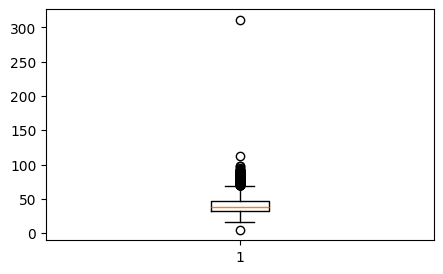

In [9]:
fig = plt.figure(figsize=(5,3))
plt.boxplot(data_df.age)
plt.show()

**AGE**  
Age attribute has a lot of outliers too but most of them are not too far away from the normal range. Age 311 and 5 are not possible and clearly an outlier. However, the outlier with values above 100 is questionable to me but it is still possible for us to consider because there are people who lives beyong the age 100.

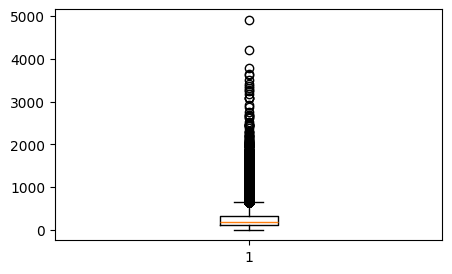

In [10]:
fig = plt.figure(figsize=(5,3))
plt.boxplot(data_df.duration)
plt.show()

**DURATION**  
Duration attribute has a lot of outliers that is out of the normal range. The most obvious outliers are values above 4000.

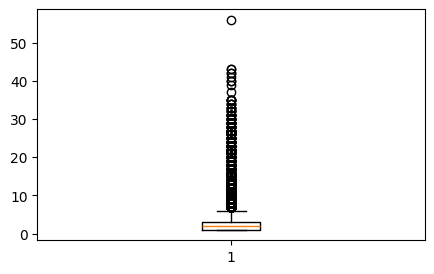

In [11]:
fig = plt.figure(figsize=(5,3))
plt.boxplot(data_df.campaign)
plt.show()

**CAMPAIGN**  
Campaign attribute also has many outliers. Since campaign attributes means the number of contacts performed during the campaign, the outliers might show that these clients have shown more interest, hence more number of contacts. I would assume the one outlier above 50 is a typo, but since it is not too much far away from the other outliers, I would not remove it.

***
## Section: 2.5 - Explore the relationships among the attributes.
- You may include or exclude the class attribute as appropriate.
- Use scatter plots, correlation matrices, cross-tabulations, group-wise averages, or other appropriate techniques. Explain and interpret any interesting relationships.
- There are three general cases for 2-attribute relationships:
  - Categorical vs Categorical
  - Categorical vs Numerical
  - Numerical vs Numerical
- See these references for additional guidance:
  - https://www.scribbr.com/statistics/statistical-tests/
  - https://researcher.life/blog/article/independent-vs-dependent-variables-definition-examples/
  - https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
***

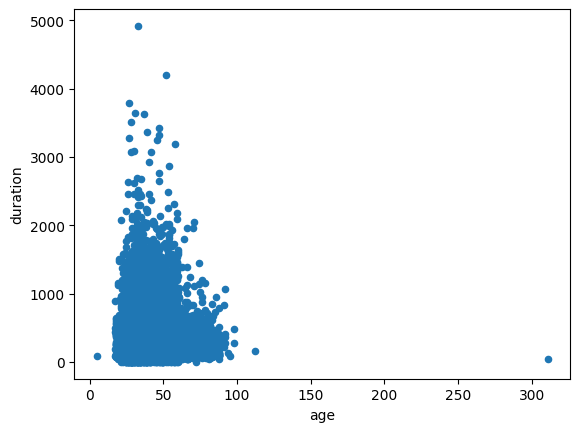

In [12]:
plot = data_df.plot.scatter(x="age",y="duration")

**Observation:**  
Firstly, we can clearly observed that as age increases, the number of duration in seconds decreases. It is also mostly concentrated within the range of 0-2000 for duration and within the range of 20-80 (rough estimation) for age. What I can deduce from this information is that a call generally would last at most 2000 seconds if you're are within the age of 20-60, and at most 1000 seconds if you're are 60 years old and above. Other than that, looking at the less concentrated area, which is when the duration would go on after 2000 seconds, it lies within the age range of 25-55. So, I would assume that clients within the age of 25-55 are mostly interested and are engaging during the call.

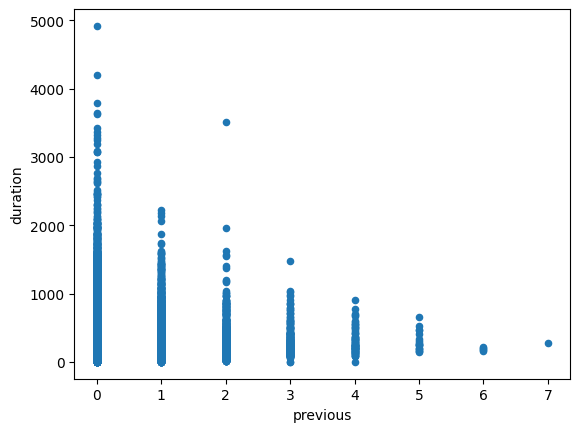

In [13]:
plot = data_df.plot.scatter(x="previous",y="duration")

**Observation**  
The reason why I chose to look at the relationship between previous and duration is because I want to check if the number of times the client was contacted before the campaign affects the duration of the last contact during the campaign. The scatter plot is showing me that previous contacts do affect the last contact duration. As we can clearly see, as the number of previous contact increases, the number of duration decreases. What I can deduce from this information is client that have never been contacted before the campaign, are more interested in the call because they are curious what the campaign is about. Meanwhile, client that have been contacted several times before the campaign, are less interested because they already know about the campaign.

***
## Section: 2.6 - Identify and explain any interesting relationships between the class attribute and the other attributes.
- You may refer to earlier analyses / visualizations (if you included the class attribute above) or create new ones.
***

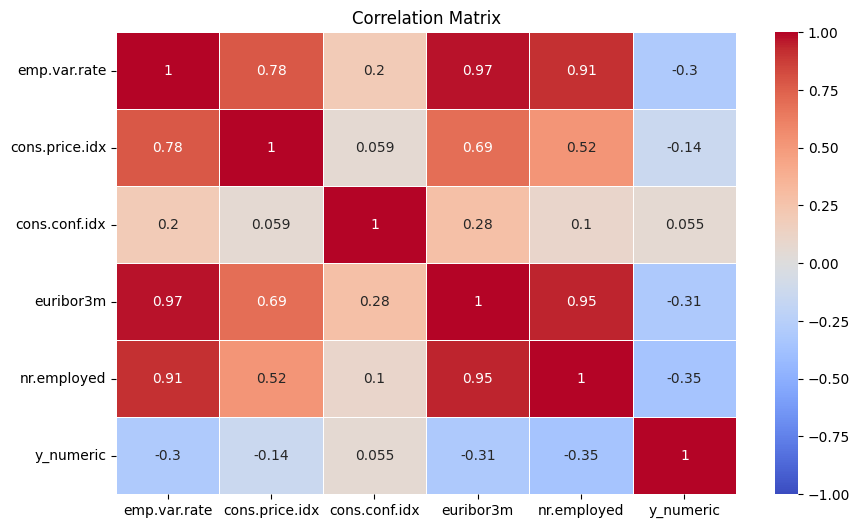

In [14]:
data_df['y_numeric'] = data_df['y'].map({'yes': 1, 'no': 0})

corr_matrix = data_df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y_numeric']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


I chose to analyse the relationship between 'y' and the attributes that I categorized under 'Other' in Section 2.1 because I'm curious to see if there is any correlation between y and these attributes. This would help me understand if any of these 'Other' attributes would affect the result of 'y'.  
Before creating the correlation matrix, I convert 'y' variable to numeric by representing yes with value 1, and no with value 0. Then, I grouped the attributes that I want to include to create the correlation matrix. I used heatmap to better visualize the correlation.  
Based on the correlation matrix heatmap, emp.var.rate, cons.price.idx, euribor3m, and nr.employed have negative correlation with the class attribute 'y'. Based on my understanding on correlation matrix, negative correlation imply an inverse relationship. So when 'y' increase, the other variable decrease. Other than that, correlation matrix between cons.conf.idx and y is 0.055, which is close to 0. So, I will assume that cons.conf.idx has no correlation to y at all.

***
# Section: 3 - Data Preparation - **DO THIS!**
In this step, the “final” target dataset is constructed (although nothing is ever final…), based on the insights gleaned in the Data Understanding step.
This may include:
- Normalizing / standardizing the data.
- Handling missing and erroneous data.
- Transforming or eliminating attributes.
- “Blending” data from multiple sources (with attention to consistency of the various sources).
- Deploying the data to storage in suitable formats, data models / structures.

**NOTE:** In each of these sections, it is OK to decide to **not** make changes to the dataset, but you **must** explain **why** you made the choice.  Recall that the purpose of this step is to produce a clean dataset that is suitable for the intended purposes.  So, for example, you might choose to not remove any attributes, but if you have 100 apparently irrelevant attributes, explain why are you keeping them - there may be a good reason.
***

***
## Section: 3.1 - Clean the Data
- Implement any data cleaning steps previously identified.  Please justify.
- Show the effects of that cleaning through the use of appropriate statistics and/or visualizations.
***

In [15]:
clean_data_df = data_df.copy()

**REMOVING OUTLIERS FROM AGE**  
- The value 311 is clearly an invalid value. Most likely, this is a typo and it should be 31.
- The value 5 is might also be an invalid value. But since that individual's marital status is married, they are likely to be in their 50s. However, in this case, I will remove it because it it harder to assume the specific age it should be.

In [16]:
#replace the invalid value
clean_data_df['age'] = clean_data_df['age'].replace(to_replace=311, value=31)
#remove the row where age == 5
indexAge = clean_data_df[(clean_data_df['age'] == 5)].index
clean_data_df.drop(indexAge, inplace=True)

**REMOVING ROWS WITH MISSING VALUES**  
- In Section 2.4, the result shows that marital, default, month, poutcome, and y attributes have 1 missing values respectively. So, I will remove the respective row because I can't fill in the missing values since it is categorical data type.

In [17]:
clean_data_df.dropna(axis=0, how='any', inplace=True, subset=['marital', 'default', 'month', 'poutcome', 'y'])

**CHECKING FOR MISSING VALUE**  
- The result below shows that cleaning the data, we no longer have any missing values in our dataset.

In [18]:
clean_na_df = clean_data_df[clean_data_df.isna().any(axis=1)]
num_records_with_na = clean_na_df.shape[0]
num_na_values = clean_na_df.isna().sum().sum()
selected_attribute_names = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

print("Total records:", clean_data_df.shape[0], "- Number of Records with NA", num_records_with_na, "- Number of NA values:", num_na_values)

clean_na_df.head(10);

for att in selected_attribute_names:
    num_na = clean_na_df[att].isna().sum()
    if num_na > 0:
        print(att, clean_na_df[att].isna().sum())

Total records: 41182 - Number of Records with NA 0 - Number of NA values: 0


**CHECKING FOR OUTLIERS IN AGE**  
- The result shows that the chosen outliers which are 311 and 5, have been removed.

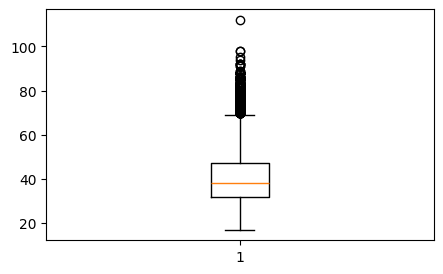

In [19]:
fig = plt.figure(figsize=(5,3))
plt.boxplot(clean_data_df.age)
plt.show()

In [20]:
clean_data_df.describe()

,IDX,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_numeric
count,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000
mean,20595.408747,40.024477,258.300471,2.567457,962.470133,0.172964,0.081778,93.575609,-40.502574,3.621187,5167.031048,0.112671
std,11889.972793,10.426296,259.293155,2.769940,186.924003,0.494917,1.570985,0.578819,4.628342,1.734474,72.253412,0.316194
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,10300.250000,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,20595.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,30891.750000,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,41188.000000,112.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


***
## Section: 3.2 - Select Attributes
- Optionally, remove attributes that are unneeded, redundant, etc., for the expected uses.
- Which attributes did you decide to remove, if any? Please justify.
***

Based on Section 2.6, I concluded that cons.conf.idx has no correlation to y variable. **Therefore, I will remove cons.conf.idx.**

In [21]:
clean_data_df.drop('cons.conf.idx', axis=1, inplace=True)

In [22]:
clean_data_df.describe()

,IDX,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y_numeric
count,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000,41182.000000
mean,20595.408747,40.024477,258.300471,2.567457,962.470133,0.172964,0.081778,93.575609,3.621187,5167.031048,0.112671
std,11889.972793,10.426296,259.293155,2.769940,186.924003,0.494917,1.570985,0.578819,1.734474,72.253412,0.316194
min,1.000000,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,0.634000,4963.600000,0.000000
25%,10300.250000,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,1.344000,5099.100000,0.000000
50%,20595.500000,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,4.857000,5191.000000,0.000000
75%,30891.750000,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,4.961000,5228.100000,0.000000
max,41188.000000,112.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,5.045000,5228.100000,1.000000


***
## Section: 3.3 - Create Attributes
- Optionally, create new attributes based on the values of other attibutes.
- Which new attributes did you decide to create, if any? Please justify.
***

**Discussion:**

I choose to not create any new attributes because first, most of our attributes inherit categorical data type, so I can't combine any 2 attributes to create a new attribute. Most importantly, I don't see a need to add a new attribute.

***
## Section: 3.4 - Transform Attributes
- Optionally, transform existing attributes (e.g., standardize, normalize, change units of measure, encode) to make them more appropriate for the expected uses.
- Which attributes did you decide to transform, if any? Please justify.
***

**Discussion:**

I don't see a need to transform any attributes. However, I want do it for practice.  
I choose to change the unit of duration from seconds to minutes. After converting it to minutes, I think it is actually more helpful to have duration in minutes because it was hard to know how long 2000 seconds are compare to knowing how long 2 minutes are.

In [23]:
clean_data_df['duration'] = clean_data_df['duration'] / 60

In [24]:
clean_data_df.head()

,IDX,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y,y_numeric
0,1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,4.350000,1,999,0,nonexistent,1.1,93.994,4.857,5191.0,no,0.0
1,2,57,services,married,high.school,unknown,no,no,telephone,may,mon,2.483333,1,999,0,nonexistent,1.1,93.994,4.857,5191.0,no,0.0
2,3,37,services,married,high.school,no,yes,no,telephone,may,mon,3.766667,1,999,0,nonexistent,1.1,93.994,4.857,5191.0,no,0.0
3,4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,2.516667,1,999,0,nonexistent,1.1,93.994,4.857,5191.0,no,0.0
4,5,56,services,married,high.school,no,no,yes,telephone,may,mon,5.116667,1,999,0,nonexistent,1.1,93.994,4.857,5191.0,no,0.0


***
## Section: 3.5 - Select Records
- Optionally, select a subset of the records, via sampling, etc., to decrease the size of the dataset. Please justify.
***

**Discussion:**

I don't see the need to trim the records too. However, I want to do it for practice. As we can see, after trimming the records, the statistics for the attributes changed accordingly.

In [25]:
clean_data_sample_df = clean_data_df.sample(n=30, replace=True, random_state=45)
clean_data_sample_df.describe()

,IDX,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,euribor3m,nr.employed,y_numeric
count,30.000000,30.000000,30.000000,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,20098.766667,38.133333,4.331111,2.366667,999.0,0.066667,0.246667,93.534633,3.923467,5182.120000,0.100000
std,10901.256693,8.443456,3.611502,1.828573,0.0,0.253708,1.366529,0.494710,1.508841,50.986614,0.305129
min,1178.000000,25.000000,1.266667,1.000000,999.0,0.000000,-2.900000,92.893000,1.250000,5076.200000,0.000000
25%,9065.250000,33.250000,2.225000,1.000000,999.0,0.000000,-0.100000,93.200000,4.076000,5191.000000,0.000000
50%,21772.000000,37.000000,3.050000,2.000000,999.0,0.000000,1.100000,93.444000,4.857000,5195.800000,0.000000
75%,26781.250000,42.250000,4.512500,2.000000,999.0,0.000000,1.400000,93.994000,4.954500,5228.100000,0.000000
max,36479.000000,59.000000,19.133333,9.000000,999.0,1.000000,1.400000,94.465000,4.970000,5228.100000,1.000000


***
## Section: 3.6 - Other Data Preparation
- Optionally, perform other preparation steps (e.g., to optimize storage, retrieval, etc.). Please justify.
***

**Discussion:**
I don't see any need to do any other data preparation.

***
# Section: 4 - Modeling - **SKIP THIS!**
In this step, the dataset is analyzed and used to create models and/or answer questions relevant to the business. This may include:
- Developing statistical models for describing or predicting business situations.
- Training data mining (e.g., machine learning) algorithms for classification, clustering, association analysis, outlier detection, and other uses.

NOTE: This step is tightly coupled and iterative with the Data Preparation and Evaluation steps.
***

**Discussion:**

Fill in...

***
# Section: 5 - Evaluation - **SKIP THIS!**
In this step, the analyses and/or models are evaluated for quality and relevance / usefulness.

NOTE: This step is tightly coupled and iterative with the Modeling step.
***

**Discussion:**

Fill in...

***
# Section: 6 - Deployment - **SKIP THIS!**
In this step, data and resulting models and/or analyses are put to use. This may include:
- Deploying data mining / machine learning algorithms to production.
- Communicating the results of the analyses to business stakeholders, so they can take action.
***

**Discussion:**

Fill in...

***
# Section: Conclusions - **DO THIS!**
- What did you learn from this exercise?
***

**What I Learned:**

Initially, it was difficult for me to understand what the dataset is about and what result or analysis we are trying to find. So while doing explaratory data analysis, I get to understand what each attributes means, but I only a get brief idea on how significant each attributes are to the y variable. Deeper into the analyis, I get to learn the different relationships between the attributes that I'm curious about and check if it affects the y variable. I also got to learned the different ways to represent the relationship between attributes. In Section 3, I learned that cleaning data is not only about removing duplicates, filling missing values but also transforming the dataset into a dataset that is more meaningful to answer questions that we are trying to solve. Overall, I got to learned how to analyze the dataset in-depth which is a very valuable skills for me, as I have no prior experience in analyzing and cleaning a dataset.